# Basic PyTorch Neural Network 
---
### What will we work with ? 
---
Time to put the pieces together. In this sections we'll :
- New York County : Nassau (36059)


## Perform Standard Imports
---

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Creating A Model Class 
---
## Activation : Leaky Relu for L1 | Relu for L2 | 
---



#### Number of Layers and Activation Function (Finalized)
#### L1 = 66 | L2 = 44 | L3 = 22
#### L1 = 200 | L2 = 44 | L3 = 10
---

In [2]:
l1 = input("Number of Layers in L 1 : ")
l2 = input("Number of Layers in L 2 : ")
l3 = input("Number of Layers in L 3 : ")
# n_iter = input("Number of Epochs : ")

l1 = int(l1)
l2 = int(l2)
l3 = int(l3)
# n_iter = int(n_iter)
n_iter = 50000

Number of Layers in L 1 : 20
Number of Layers in L 2 : 10
Number of Layers in L 3 : 5


In [3]:
class Model(nn.Module):
    def __init__(self, in_features=1, l1=l1, l2=l2, l3=l3, out_features=1):
        
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(in_features, l1)
        # hidden layer 1
        self.fc2 = nn.Linear(l1, l2)
        # hidden layer 2
        self.fc3 = nn.Linear(l2, l3)
        #output layer
        self.out = nn.Linear(l3, out_features)
        
          
    def forward(self, x):
        
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = (self.fc3(x))
        
        x = self.out(x)
        
        return x

## Instantiate the Model class using parameter defaults
---

In [4]:
torch.manual_seed(44)
model = Model()

## Load Dataset

In [5]:
train_d = pd.read_csv('../data_data/infected_ts_output.csv')
# test_d = pd.read_csv('../data_data/test_infections.csv')

In [6]:
ny = train_d[train_d['FIPS'] == 36059]
ny = ny.T

ny = ny.drop(ny.index[0])
ny = ny.drop(ny.index[0])

ny.columns = ['number of infected']
ny = ny[ny['number of infected'] != 0]

In [7]:
ny = ny.to_numpy(dtype=float)

In [8]:
X_train = torch.arange(1.,87.,1)
X_train = X_train.reshape((86,-1))

y_train = ny[0:86,-1]
y_train = y_train.reshape((86,-1))

X_test = torch.arange(51.,87.,1)
X_test = X_test.reshape((36,-1))

y_test = ny[50:86,-1]
y_test = y_test.reshape((36,-1))

X_train = train_d.iloc[:,0:10]
y_train = train_d.iloc[:,10:11]

X_test = test_d.iloc[:,0:10]
y_test = test_d.iloc[:,0:10:11]

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

## Prepare DataLoader
---
For this analysis we don't need to create a Dataset object. <br>
But we should take advantage of PyTorch's DataLoader tool. <br>
Even though our dataset is small, we'll load it into our model in two batches. <br>
This technique becomes very helpful with large datasets.

In [10]:
trainloader = DataLoader(X_train, batch_size=100, shuffle=True)

testloader = DataLoader(X_test, batch_size=10, shuffle=False)

In [11]:
# For Redo
torch.manual_seed(44)
model = Model()

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [13]:
epochs = n_iter
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():1.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 752539008.00000000
epoch: 11  loss: 752533952.00000000
epoch: 21  loss: 752528576.00000000
epoch: 31  loss: 752523328.00000000
epoch: 41  loss: 752517760.00000000
epoch: 51  loss: 752512000.00000000
epoch: 61  loss: 752506048.00000000
epoch: 71  loss: 752499776.00000000
epoch: 81  loss: 752493312.00000000
epoch: 91  loss: 752486592.00000000
epoch: 101  loss: 752479488.00000000
epoch: 111  loss: 752470464.00000000
epoch: 121  loss: 752459328.00000000
epoch: 131  loss: 752447616.00000000
epoch: 141  loss: 752435584.00000000
epoch: 151  loss: 752422912.00000000
epoch: 161  loss: 752410048.00000000
epoch: 171  loss: 752395968.00000000
epoch: 181  loss: 752374720.00000000
epoch: 191  loss: 752351680.00000000
epoch: 201  loss: 752328128.00000000
epoch: 211  loss: 752303936.00000000
epoch: 221  loss: 752279552.00000000
epoch: 231  loss: 752254528.00000000
epoch: 241  loss: 752228608.00000000
epoch: 251  loss: 752201920.00000000
epoch: 261  loss: 752174656.00000000
epoch: 271 

epoch: 2191  loss: 682579456.00000000
epoch: 2201  loss: 681671872.00000000
epoch: 2211  loss: 680757184.00000000
epoch: 2221  loss: 679835328.00000000
epoch: 2231  loss: 678906304.00000000
epoch: 2241  loss: 677970112.00000000
epoch: 2251  loss: 677026816.00000000
epoch: 2261  loss: 676076352.00000000
epoch: 2271  loss: 675118784.00000000
epoch: 2281  loss: 674153984.00000000
epoch: 2291  loss: 673181824.00000000
epoch: 2301  loss: 672202752.00000000
epoch: 2311  loss: 671216384.00000000
epoch: 2321  loss: 670222720.00000000
epoch: 2331  loss: 669222016.00000000
epoch: 2341  loss: 668213952.00000000
epoch: 2351  loss: 667198656.00000000
epoch: 2361  loss: 666176320.00000000
epoch: 2371  loss: 665146752.00000000
epoch: 2381  loss: 664109760.00000000
epoch: 2391  loss: 663065792.00000000
epoch: 2401  loss: 662014528.00000000
epoch: 2411  loss: 660955904.00000000
epoch: 2421  loss: 659890176.00000000
epoch: 2431  loss: 658817280.00000000
epoch: 2441  loss: 657736960.00000000
epoch: 2451 

epoch: 4441  loss: 324942400.00000000
epoch: 4451  loss: 322980000.00000000
epoch: 4461  loss: 321018752.00000000
epoch: 4471  loss: 319058720.00000000
epoch: 4481  loss: 317100160.00000000
epoch: 4491  loss: 315142944.00000000
epoch: 4501  loss: 313187104.00000000
epoch: 4511  loss: 311232960.00000000
epoch: 4521  loss: 309280416.00000000
epoch: 4531  loss: 307329600.00000000
epoch: 4541  loss: 305380640.00000000
epoch: 4551  loss: 303433408.00000000
epoch: 4561  loss: 301488224.00000000
epoch: 4571  loss: 299545152.00000000
epoch: 4581  loss: 297604096.00000000
epoch: 4591  loss: 295665184.00000000
epoch: 4601  loss: 293728640.00000000
epoch: 4611  loss: 291794400.00000000
epoch: 4621  loss: 289862624.00000000
epoch: 4631  loss: 287933248.00000000
epoch: 4641  loss: 286006560.00000000
epoch: 4651  loss: 284082528.00000000
epoch: 4661  loss: 282161184.00000000
epoch: 4671  loss: 280242688.00000000
epoch: 4681  loss: 278327072.00000000
epoch: 4691  loss: 276414496.00000000
epoch: 4701 

epoch: 6681  loss: 36289028.00000000
epoch: 6691  loss: 35947136.00000000
epoch: 6701  loss: 35612040.00000000
epoch: 6711  loss: 35283728.00000000
epoch: 6721  loss: 34962084.00000000
epoch: 6731  loss: 34647024.00000000
epoch: 6741  loss: 34338488.00000000
epoch: 6751  loss: 34036404.00000000
epoch: 6761  loss: 33740668.00000000
epoch: 6771  loss: 33451222.00000000
epoch: 6781  loss: 33167958.00000000
epoch: 6791  loss: 32890848.00000000
epoch: 6801  loss: 32619762.00000000
epoch: 6811  loss: 32354650.00000000
epoch: 6821  loss: 32095408.00000000
epoch: 6831  loss: 31841968.00000000
epoch: 6841  loss: 31594264.00000000
epoch: 6851  loss: 31352206.00000000
epoch: 6861  loss: 31115698.00000000
epoch: 6871  loss: 30884668.00000000
epoch: 6881  loss: 30659042.00000000
epoch: 6891  loss: 30438718.00000000
epoch: 6901  loss: 30223646.00000000
epoch: 6911  loss: 30013726.00000000
epoch: 6921  loss: 29808872.00000000
epoch: 6931  loss: 29609044.00000000
epoch: 6941  loss: 29414124.00000000
e

epoch: 8931  loss: 23275458.00000000
epoch: 8941  loss: 23274878.00000000
epoch: 8951  loss: 23274306.00000000
epoch: 8961  loss: 23273720.00000000
epoch: 8971  loss: 23273136.00000000
epoch: 8981  loss: 23272554.00000000
epoch: 8991  loss: 23271962.00000000
epoch: 9001  loss: 23271378.00000000
epoch: 9011  loss: 23270790.00000000
epoch: 9021  loss: 23270200.00000000
epoch: 9031  loss: 23269608.00000000
epoch: 9041  loss: 23269012.00000000
epoch: 9051  loss: 23268426.00000000
epoch: 9061  loss: 23267824.00000000
epoch: 9071  loss: 23267228.00000000
epoch: 9081  loss: 23266626.00000000
epoch: 9091  loss: 23266034.00000000
epoch: 9101  loss: 23265434.00000000
epoch: 9111  loss: 23264830.00000000
epoch: 9121  loss: 23264224.00000000
epoch: 9131  loss: 23263620.00000000
epoch: 9141  loss: 23263016.00000000
epoch: 9151  loss: 23262414.00000000
epoch: 9161  loss: 23261798.00000000
epoch: 9171  loss: 23261190.00000000
epoch: 9181  loss: 23260572.00000000
epoch: 9191  loss: 23259966.00000000
e

epoch: 11191  loss: 23114986.00000000
epoch: 11201  loss: 23114182.00000000
epoch: 11211  loss: 23113382.00000000
epoch: 11221  loss: 23112582.00000000
epoch: 11231  loss: 23111772.00000000
epoch: 11241  loss: 23110980.00000000
epoch: 11251  loss: 23110170.00000000
epoch: 11261  loss: 23109378.00000000
epoch: 11271  loss: 23108566.00000000
epoch: 11281  loss: 23107766.00000000
epoch: 11291  loss: 23106960.00000000
epoch: 11301  loss: 23106156.00000000
epoch: 11311  loss: 23105352.00000000
epoch: 11321  loss: 23104550.00000000
epoch: 11331  loss: 23103742.00000000
epoch: 11341  loss: 23102942.00000000
epoch: 11351  loss: 23102126.00000000
epoch: 11361  loss: 23101326.00000000
epoch: 11371  loss: 23100522.00000000
epoch: 11381  loss: 23099716.00000000
epoch: 11391  loss: 23098904.00000000
epoch: 11401  loss: 23098092.00000000
epoch: 11411  loss: 23097288.00000000
epoch: 11421  loss: 23096484.00000000
epoch: 11431  loss: 23095676.00000000
epoch: 11441  loss: 23094862.00000000
epoch: 11451

epoch: 13431  loss: 22929856.00000000
epoch: 13441  loss: 22929016.00000000
epoch: 13451  loss: 22928178.00000000
epoch: 13461  loss: 22927340.00000000
epoch: 13471  loss: 22926498.00000000
epoch: 13481  loss: 22925660.00000000
epoch: 13491  loss: 22924822.00000000
epoch: 13501  loss: 22923982.00000000
epoch: 13511  loss: 22923140.00000000
epoch: 13521  loss: 22922296.00000000
epoch: 13531  loss: 22921464.00000000
epoch: 13541  loss: 22920620.00000000
epoch: 13551  loss: 22919778.00000000
epoch: 13561  loss: 22918940.00000000
epoch: 13571  loss: 22918102.00000000
epoch: 13581  loss: 22917262.00000000
epoch: 13591  loss: 22916424.00000000
epoch: 13601  loss: 22915582.00000000
epoch: 13611  loss: 22914742.00000000
epoch: 13621  loss: 22913900.00000000
epoch: 13631  loss: 22913062.00000000
epoch: 13641  loss: 22912218.00000000
epoch: 13651  loss: 22911380.00000000
epoch: 13661  loss: 22910538.00000000
epoch: 13671  loss: 22909704.00000000
epoch: 13681  loss: 22908862.00000000
epoch: 13691

epoch: 15681  loss: 22740290.00000000
epoch: 15691  loss: 22739442.00000000
epoch: 15701  loss: 22738596.00000000
epoch: 15711  loss: 22737750.00000000
epoch: 15721  loss: 22736910.00000000
epoch: 15731  loss: 22736056.00000000
epoch: 15741  loss: 22735218.00000000
epoch: 15751  loss: 22734370.00000000
epoch: 15761  loss: 22733524.00000000
epoch: 15771  loss: 22732680.00000000
epoch: 15781  loss: 22731836.00000000
epoch: 15791  loss: 22730984.00000000
epoch: 15801  loss: 22730142.00000000
epoch: 15811  loss: 22729292.00000000
epoch: 15821  loss: 22728446.00000000
epoch: 15831  loss: 22727600.00000000
epoch: 15841  loss: 22726754.00000000
epoch: 15851  loss: 22725906.00000000
epoch: 15861  loss: 22725066.00000000
epoch: 15871  loss: 22724220.00000000
epoch: 15881  loss: 22723374.00000000
epoch: 15891  loss: 22722530.00000000
epoch: 15901  loss: 22721678.00000000
epoch: 15911  loss: 22720834.00000000
epoch: 15921  loss: 22719990.00000000
epoch: 15931  loss: 22719142.00000000
epoch: 15941

epoch: 17951  loss: 22546838.00000000
epoch: 17961  loss: 22545974.00000000
epoch: 17971  loss: 22545116.00000000
epoch: 17981  loss: 22544250.00000000
epoch: 17991  loss: 22543382.00000000
epoch: 18001  loss: 22542520.00000000
epoch: 18011  loss: 22541652.00000000
epoch: 18021  loss: 22540784.00000000
epoch: 18031  loss: 22539924.00000000
epoch: 18041  loss: 22539058.00000000
epoch: 18051  loss: 22538196.00000000
epoch: 18061  loss: 22537328.00000000
epoch: 18071  loss: 22536464.00000000
epoch: 18081  loss: 22535596.00000000
epoch: 18091  loss: 22534734.00000000
epoch: 18101  loss: 22533864.00000000
epoch: 18111  loss: 22533000.00000000
epoch: 18121  loss: 22532128.00000000
epoch: 18131  loss: 22531264.00000000
epoch: 18141  loss: 22530398.00000000
epoch: 18151  loss: 22529530.00000000
epoch: 18161  loss: 22528654.00000000
epoch: 18171  loss: 22527794.00000000
epoch: 18181  loss: 22526930.00000000
epoch: 18191  loss: 22526060.00000000
epoch: 18201  loss: 22525194.00000000
epoch: 18211

epoch: 20261  loss: 22339744.00000000
epoch: 20271  loss: 22338796.00000000
epoch: 20281  loss: 22337842.00000000
epoch: 20291  loss: 22336890.00000000
epoch: 20301  loss: 22335934.00000000
epoch: 20311  loss: 22334978.00000000
epoch: 20321  loss: 22334030.00000000
epoch: 20331  loss: 22333076.00000000
epoch: 20341  loss: 22332116.00000000
epoch: 20351  loss: 22331160.00000000
epoch: 20361  loss: 22330200.00000000
epoch: 20371  loss: 22329246.00000000
epoch: 20381  loss: 22328284.00000000
epoch: 20391  loss: 22327326.00000000
epoch: 20401  loss: 22326362.00000000
epoch: 20411  loss: 22325402.00000000
epoch: 20421  loss: 22324436.00000000
epoch: 20431  loss: 22323474.00000000
epoch: 20441  loss: 22322510.00000000
epoch: 20451  loss: 22321546.00000000
epoch: 20461  loss: 22320574.00000000
epoch: 20471  loss: 22319610.00000000
epoch: 20481  loss: 22318644.00000000
epoch: 20491  loss: 22317682.00000000
epoch: 20501  loss: 22316698.00000000
epoch: 20511  loss: 22315732.00000000
epoch: 20521

epoch: 22451  loss: 22093144.00000000
epoch: 22461  loss: 22091714.00000000
epoch: 22471  loss: 22090264.00000000
epoch: 22481  loss: 22088828.00000000
epoch: 22491  loss: 22087370.00000000
epoch: 22501  loss: 22085920.00000000
epoch: 22511  loss: 22084454.00000000
epoch: 22521  loss: 22082990.00000000
epoch: 22531  loss: 22081518.00000000
epoch: 22541  loss: 22080048.00000000
epoch: 22551  loss: 22078574.00000000
epoch: 22561  loss: 22077092.00000000
epoch: 22571  loss: 22075602.00000000
epoch: 22581  loss: 22074108.00000000
epoch: 22591  loss: 22072590.00000000
epoch: 22601  loss: 22071082.00000000
epoch: 22611  loss: 22069556.00000000
epoch: 22621  loss: 22068030.00000000
epoch: 22631  loss: 22066494.00000000
epoch: 22641  loss: 22064962.00000000
epoch: 22651  loss: 22063418.00000000
epoch: 22661  loss: 22061880.00000000
epoch: 22671  loss: 22060330.00000000
epoch: 22681  loss: 22058786.00000000
epoch: 22691  loss: 22057230.00000000
epoch: 22701  loss: 22055672.00000000
epoch: 22711

epoch: 24771  loss: 21390894.00000000
epoch: 24781  loss: 21387370.00000000
epoch: 24791  loss: 21383834.00000000
epoch: 24801  loss: 21380290.00000000
epoch: 24811  loss: 21376742.00000000
epoch: 24821  loss: 21373182.00000000
epoch: 24831  loss: 21369604.00000000
epoch: 24841  loss: 21366030.00000000
epoch: 24851  loss: 21362442.00000000
epoch: 24861  loss: 21358850.00000000
epoch: 24871  loss: 21355238.00000000
epoch: 24881  loss: 21351624.00000000
epoch: 24891  loss: 21348000.00000000
epoch: 24901  loss: 21344368.00000000
epoch: 24911  loss: 21340722.00000000
epoch: 24921  loss: 21337074.00000000
epoch: 24931  loss: 21333412.00000000
epoch: 24941  loss: 21329744.00000000
epoch: 24951  loss: 21326062.00000000
epoch: 24961  loss: 21322374.00000000
epoch: 24971  loss: 21318682.00000000
epoch: 24981  loss: 21314980.00000000
epoch: 24991  loss: 21311266.00000000
epoch: 25001  loss: 21307534.00000000
epoch: 25011  loss: 21303804.00000000
epoch: 25021  loss: 21300058.00000000
epoch: 25031

epoch: 27051  loss: 20326050.00000000
epoch: 27061  loss: 20320092.00000000
epoch: 27071  loss: 20314110.00000000
epoch: 27081  loss: 20308116.00000000
epoch: 27091  loss: 20302118.00000000
epoch: 27101  loss: 20296094.00000000
epoch: 27111  loss: 20290068.00000000
epoch: 27121  loss: 20284016.00000000
epoch: 27131  loss: 20277960.00000000
epoch: 27141  loss: 20271886.00000000
epoch: 27151  loss: 20265796.00000000
epoch: 27161  loss: 20259704.00000000
epoch: 27171  loss: 20253590.00000000
epoch: 27181  loss: 20247456.00000000
epoch: 27191  loss: 20241318.00000000
epoch: 27201  loss: 20235168.00000000
epoch: 27211  loss: 20229004.00000000
epoch: 27221  loss: 20222820.00000000
epoch: 27231  loss: 20216634.00000000
epoch: 27241  loss: 20210430.00000000
epoch: 27251  loss: 20204206.00000000
epoch: 27261  loss: 20197976.00000000
epoch: 27271  loss: 20191736.00000000
epoch: 27281  loss: 20185480.00000000
epoch: 27291  loss: 20179212.00000000
epoch: 27301  loss: 20172940.00000000
epoch: 27311

epoch: 29241  loss: 18833824.00000000
epoch: 29251  loss: 18826846.00000000
epoch: 29261  loss: 18819854.00000000
epoch: 29271  loss: 18812880.00000000
epoch: 29281  loss: 18805908.00000000
epoch: 29291  loss: 18798934.00000000
epoch: 29301  loss: 18791970.00000000
epoch: 29311  loss: 18785006.00000000
epoch: 29321  loss: 18778050.00000000
epoch: 29331  loss: 18771098.00000000
epoch: 29341  loss: 18764150.00000000
epoch: 29351  loss: 18757200.00000000
epoch: 29361  loss: 18750264.00000000
epoch: 29371  loss: 18743330.00000000
epoch: 29381  loss: 18736396.00000000
epoch: 29391  loss: 18729466.00000000
epoch: 29401  loss: 18722530.00000000
epoch: 29411  loss: 18715592.00000000
epoch: 29421  loss: 18708652.00000000
epoch: 29431  loss: 18701734.00000000
epoch: 29441  loss: 18694822.00000000
epoch: 29451  loss: 18687904.00000000
epoch: 29461  loss: 18681002.00000000
epoch: 29471  loss: 18674110.00000000
epoch: 29481  loss: 18667208.00000000
epoch: 29491  loss: 18660316.00000000
epoch: 29501

epoch: 31601  loss: 17396094.00000000
epoch: 31611  loss: 17391356.00000000
epoch: 31621  loss: 17386630.00000000
epoch: 31631  loss: 17381948.00000000
epoch: 31641  loss: 17377250.00000000
epoch: 31651  loss: 17372564.00000000
epoch: 31661  loss: 17367910.00000000
epoch: 31671  loss: 17363260.00000000
epoch: 31681  loss: 17358648.00000000
epoch: 31691  loss: 17354010.00000000
epoch: 31701  loss: 17349408.00000000
epoch: 31711  loss: 17344840.00000000
epoch: 31721  loss: 17340242.00000000
epoch: 31731  loss: 17335686.00000000
epoch: 31741  loss: 17331156.00000000
epoch: 31751  loss: 17326628.00000000
epoch: 31761  loss: 17322114.00000000
epoch: 31771  loss: 17317614.00000000
epoch: 31781  loss: 17313154.00000000
epoch: 31791  loss: 17308694.00000000
epoch: 31801  loss: 17304212.00000000
epoch: 31811  loss: 17299790.00000000
epoch: 31821  loss: 17295370.00000000
epoch: 31831  loss: 17290952.00000000
epoch: 31841  loss: 17286580.00000000
epoch: 31851  loss: 17282188.00000000
epoch: 31861

epoch: 33841  loss: 16721066.00000000
epoch: 33851  loss: 16718056.00000000
epoch: 33861  loss: 16714389.00000000
epoch: 33871  loss: 16709665.00000000
epoch: 33881  loss: 16703521.00000000
epoch: 33891  loss: 16695433.00000000
epoch: 33901  loss: 16684642.00000000
epoch: 33911  loss: 16670757.00000000
epoch: 33921  loss: 16652330.00000000
epoch: 33931  loss: 16627968.00000000
epoch: 33941  loss: 16596669.00000000
epoch: 33951  loss: 16559872.00000000
epoch: 33961  loss: 16524013.00000000
epoch: 33971  loss: 16503354.00000000
epoch: 33981  loss: 16499463.00000000
epoch: 33991  loss: 16497277.00000000
epoch: 34001  loss: 16494318.00000000
epoch: 34011  loss: 16492099.00000000
epoch: 34021  loss: 16489994.00000000
epoch: 34031  loss: 16487952.00000000
epoch: 34041  loss: 16485955.00000000
epoch: 34051  loss: 16483981.00000000
epoch: 34061  loss: 16482038.00000000
epoch: 34071  loss: 16480134.00000000
epoch: 34081  loss: 16478241.00000000
epoch: 34091  loss: 16476394.00000000
epoch: 34101

epoch: 36071  loss: 16146404.00000000
epoch: 36081  loss: 16144385.00000000
epoch: 36091  loss: 16142391.00000000
epoch: 36101  loss: 16140368.00000000
epoch: 36111  loss: 16138361.00000000
epoch: 36121  loss: 16136323.00000000
epoch: 36131  loss: 16134326.00000000
epoch: 36141  loss: 16132297.00000000
epoch: 36151  loss: 16130252.00000000
epoch: 36161  loss: 16128244.00000000
epoch: 36171  loss: 16126187.00000000
epoch: 36181  loss: 16124109.00000000
epoch: 36191  loss: 16122064.00000000
epoch: 36201  loss: 16120027.00000000
epoch: 36211  loss: 16117927.00000000
epoch: 36221  loss: 16115855.00000000
epoch: 36231  loss: 16113780.00000000
epoch: 36241  loss: 16111711.00000000
epoch: 36251  loss: 16109611.00000000
epoch: 36261  loss: 16107551.00000000
epoch: 36271  loss: 16105439.00000000
epoch: 36281  loss: 16103318.00000000
epoch: 36291  loss: 16101229.00000000
epoch: 36301  loss: 16099120.00000000
epoch: 36311  loss: 16097011.00000000
epoch: 36321  loss: 16094875.00000000
epoch: 36331

epoch: 38241  loss: 15599292.00000000
epoch: 38251  loss: 15596327.00000000
epoch: 38261  loss: 15593292.00000000
epoch: 38271  loss: 15590276.00000000
epoch: 38281  loss: 15587297.00000000
epoch: 38291  loss: 15584293.00000000
epoch: 38301  loss: 15581238.00000000
epoch: 38311  loss: 15578204.00000000
epoch: 38321  loss: 15575193.00000000
epoch: 38331  loss: 15572191.00000000
epoch: 38341  loss: 15569137.00000000
epoch: 38351  loss: 15566083.00000000
epoch: 38361  loss: 15563050.00000000
epoch: 38371  loss: 15559981.00000000
epoch: 38381  loss: 15556950.00000000
epoch: 38391  loss: 15553887.00000000
epoch: 38401  loss: 15550794.00000000
epoch: 38411  loss: 15547730.00000000
epoch: 38421  loss: 15544674.00000000
epoch: 38431  loss: 15541608.00000000
epoch: 38441  loss: 15538509.00000000
epoch: 38451  loss: 15535445.00000000
epoch: 38461  loss: 15532383.00000000
epoch: 38471  loss: 15529284.00000000
epoch: 38481  loss: 15526196.00000000
epoch: 38491  loss: 15523124.00000000
epoch: 38501

epoch: 40421  loss: 14858204.00000000
epoch: 40431  loss: 14854354.00000000
epoch: 40441  loss: 14850596.00000000
epoch: 40451  loss: 14846824.00000000
epoch: 40461  loss: 14842986.00000000
epoch: 40471  loss: 14839236.00000000
epoch: 40481  loss: 14835455.00000000
epoch: 40491  loss: 14831631.00000000
epoch: 40501  loss: 14827809.00000000
epoch: 40511  loss: 14823987.00000000
epoch: 40521  loss: 14820178.00000000
epoch: 40531  loss: 14816332.00000000
epoch: 40541  loss: 14812575.00000000
epoch: 40551  loss: 14808722.00000000
epoch: 40561  loss: 14804900.00000000
epoch: 40571  loss: 14801060.00000000
epoch: 40581  loss: 14797197.00000000
epoch: 40591  loss: 14793345.00000000
epoch: 40601  loss: 14789547.00000000
epoch: 40611  loss: 14785655.00000000
epoch: 40621  loss: 14781820.00000000
epoch: 40631  loss: 14777971.00000000
epoch: 40641  loss: 14774096.00000000
epoch: 40651  loss: 14770258.00000000
epoch: 40661  loss: 14766373.00000000
epoch: 40671  loss: 14762533.00000000
epoch: 40681

epoch: 42641  loss: 13930535.00000000
epoch: 42651  loss: 13925879.00000000
epoch: 42661  loss: 13921301.00000000
epoch: 42671  loss: 13916735.00000000
epoch: 42681  loss: 13912128.00000000
epoch: 42691  loss: 13907551.00000000
epoch: 42701  loss: 13903019.00000000
epoch: 42711  loss: 13898386.00000000
epoch: 42721  loss: 13893770.00000000
epoch: 42731  loss: 13889145.00000000
epoch: 42741  loss: 13884554.00000000
epoch: 42751  loss: 13879975.00000000
epoch: 42761  loss: 13875346.00000000
epoch: 42771  loss: 13870739.00000000
epoch: 42781  loss: 13866100.00000000
epoch: 42791  loss: 13861532.00000000
epoch: 42801  loss: 13856902.00000000
epoch: 42811  loss: 13852227.00000000
epoch: 42821  loss: 13847573.00000000
epoch: 42831  loss: 13842996.00000000
epoch: 42841  loss: 13838311.00000000
epoch: 42851  loss: 13833621.00000000
epoch: 42861  loss: 13828995.00000000
epoch: 42871  loss: 13824324.00000000
epoch: 42881  loss: 13819681.00000000
epoch: 42891  loss: 13814998.00000000
epoch: 42901

epoch: 44821  loss: 12848089.00000000
epoch: 44831  loss: 12842713.00000000
epoch: 44841  loss: 12837337.00000000
epoch: 44851  loss: 12832021.00000000
epoch: 44861  loss: 12826640.00000000
epoch: 44871  loss: 12821236.00000000
epoch: 44881  loss: 12815832.00000000
epoch: 44891  loss: 12810425.00000000
epoch: 44901  loss: 12804934.00000000
epoch: 44911  loss: 12799586.00000000
epoch: 44921  loss: 12794204.00000000
epoch: 44931  loss: 12788737.00000000
epoch: 44941  loss: 12783315.00000000
epoch: 44951  loss: 12777908.00000000
epoch: 44961  loss: 12772514.00000000
epoch: 44971  loss: 12767085.00000000
epoch: 44981  loss: 12761652.00000000
epoch: 44991  loss: 12756179.00000000
epoch: 45001  loss: 12750763.00000000
epoch: 45011  loss: 12745328.00000000
epoch: 45021  loss: 12739852.00000000
epoch: 45031  loss: 12734455.00000000
epoch: 45041  loss: 12728990.00000000
epoch: 45051  loss: 12723530.00000000
epoch: 45061  loss: 12718074.00000000
epoch: 45071  loss: 12712631.00000000
epoch: 45081

epoch: 47051  loss: 11564940.00000000
epoch: 47061  loss: 11558746.00000000
epoch: 47071  loss: 11552665.00000000
epoch: 47081  loss: 11546489.00000000
epoch: 47091  loss: 11540331.00000000
epoch: 47101  loss: 11534204.00000000
epoch: 47111  loss: 11528040.00000000
epoch: 47121  loss: 11521905.00000000
epoch: 47131  loss: 11515812.00000000
epoch: 47141  loss: 11509652.00000000
epoch: 47151  loss: 11503341.00000000
epoch: 47161  loss: 11497239.00000000
epoch: 47171  loss: 11491098.00000000
epoch: 47181  loss: 11484891.00000000
epoch: 47191  loss: 11478704.00000000
epoch: 47201  loss: 11472510.00000000
epoch: 47211  loss: 11466367.00000000
epoch: 47221  loss: 11460162.00000000
epoch: 47231  loss: 11453992.00000000
epoch: 47241  loss: 11447725.00000000
epoch: 47251  loss: 11441589.00000000
epoch: 47261  loss: 11435347.00000000
epoch: 47271  loss: 11429180.00000000
epoch: 47281  loss: 11422956.00000000
epoch: 47291  loss: 11416754.00000000
epoch: 47301  loss: 11410585.00000000
epoch: 47311

epoch: 49231  loss: 9817040.00000000
epoch: 49241  loss: 9808283.00000000
epoch: 49251  loss: 9799589.00000000
epoch: 49261  loss: 9790992.00000000
epoch: 49271  loss: 9782228.00000000
epoch: 49281  loss: 9773644.00000000
epoch: 49291  loss: 9765121.00000000
epoch: 49301  loss: 9756668.00000000
epoch: 49311  loss: 9748319.00000000
epoch: 49321  loss: 9739837.00000000
epoch: 49331  loss: 9731585.00000000
epoch: 49341  loss: 9723148.00000000
epoch: 49351  loss: 9714904.00000000
epoch: 49361  loss: 9706489.00000000
epoch: 49371  loss: 9698190.00000000
epoch: 49381  loss: 9689983.00000000
epoch: 49391  loss: 9681820.00000000
epoch: 49401  loss: 9673581.00000000
epoch: 49411  loss: 9665404.00000000
epoch: 49421  loss: 9657267.00000000
epoch: 49431  loss: 9649117.00000000
epoch: 49441  loss: 9640996.00000000
epoch: 49451  loss: 9632883.00000000
epoch: 49461  loss: 9624731.00000000
epoch: 49471  loss: 9616631.00000000
epoch: 49481  loss: 9608472.00000000
epoch: 49491  loss: 9600511.00000000
e

Text(0.5, 0, 'epoch')

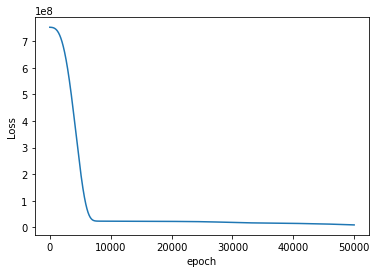

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [15]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

RMSE: 3032.41845703


## Validate the model
---
Here, we want to run the entire test set through the model, and compare it to the known value. <br>
For this step, we don't want to update weights and biases, so we set torch.no_grad()

In [16]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3683.82666016


# Calculating the R2 score for regression
---
#### Using scikit learn library to calculate this
#### r2_score(y_true, y_pred)
---

Note : This metrics shows goodness of fit for the regression model. We don't have a time series data in this model. So, it will be not useful use this metric for now. Might be useful once we use this model for a particular county with a time series data.

In [17]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

score = r2(y_train, y_val)
score

RMSE: 3032.41845703


0.9631857866284129

In [18]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

score = r2(y_test, y_val)
score

RMSE: 3683.82666016


-2.6058182015192575